In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

In [4]:
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)

In [62]:
X_train_mnist.shape, X_test_mnist.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [63]:
X_test_mnist.min(), X_test_mnist.max()

(0, 255)

In [5]:
X_train_mnist = X_train_mnist / X_train_mnist.max()
X_test_mnist = X_test_mnist / X_test_mnist.max()

In [6]:
type(X_test_mnist), X_test_mnist.shape

(numpy.ndarray, (10000, 28, 28, 1))

In [65]:
X_train_mnist.max()

1.0

In [66]:
mnist_model = keras.models.Sequential()
mnist_model.add(keras.layers.Input(shape=(28, 28, 1)))

mnist_model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
mnist_model.add(keras.layers.MaxPooling2D(pool_size=2))

mnist_model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
mnist_model.add(keras.layers.MaxPooling2D(pool_size=2))

# mnist_model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
# mnist_model.add(keras.layers.MaxPooling2D(pool_size=2))

mnist_model.add(keras.layers.Flatten())

mnist_model.add(keras.layers.Dense(10, activation="softmax"))

In [67]:
mnist_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [68]:
# adam = keras.optimizers.Adam(( learning_rate=0.001))
mnist_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
X_train_mnist.min(), X_train_mnist.max()

(0.0, 1.0)

In [70]:
mnist_model.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 19s 39ms/step - loss: 0.2544 - accuracy: 0.9278
Epoch 2/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 3/5
469/469 [==============================] - 17s 37ms/step - loss: 0.0472 - accuracy: 0.9855
Epoch 4/5
469/469 [==============================] - 17s 36ms/step - loss: 0.0388 - accuracy: 0.9886
Epoch 5/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0323 - accuracy: 0.9900


In [71]:
mnist_model.evaluate(X_test_mnist, y_test_mnist)

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9880


[0.03418730944395065, 0.9879999756813049]

In [72]:
mnist_model.save(filepath="models/mnist_model.h5")

In [7]:
mnist_model2 = keras.models.load_model(filepath="models/mnist_model.h5")

In [ ]:
mnist_model2.predict()

In [74]:
mnist_model2.evaluate(X_test_mnist, y_test_mnist)

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9880


[0.03418730944395065, 0.9879999756813049]

In [33]:
# fashion mnist CNN 모델 개발

In [34]:
(X_train_fm, y_train_fm), (X_test_fm, y_test_fm) = keras.datasets.fashion_mnist.load_data()

In [35]:
X_train_fm = X_train_fm.reshape(-1, 28, 28, 1)
X_test_fm = X_test_fm.reshape(-1, 28, 28, 1)
X_train_fm = X_train_fm / X_train_fm.max()
X_test_fm = X_test_fm / X_test_fm.max()

In [53]:
model_fm = keras.models.Sequential()

model_fm.add(keras.layers.Input(shape=(28, 28, 1)))

model_fm.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model_fm.add(keras.layers.MaxPooling2D(pool_size=2))

model_fm.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model_fm.add(keras.layers.MaxPooling2D(pool_size=2))

model_fm.add(keras.layers.Flatten())
model_fm.add(keras.layers.Dense(10, activation="softmax"))

In [47]:
model_fm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [38]:
y_train_fm.shape

(60000,)

In [54]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model_fm.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [55]:
history = model_fm.fit(X_train_fm, y_train_fm, epochs=30, validation_split=0.2, batch_size=128)

Epoch 1/30
375/375 [==============================] - 16s 42ms/step - loss: 0.5700 - accuracy: 0.7991 - val_loss: 0.4150 - val_accuracy: 0.8515
Epoch 2/30
375/375 [==============================] - 15s 40ms/step - loss: 0.3640 - accuracy: 0.8714 - val_loss: 0.3377 - val_accuracy: 0.8799
Epoch 3/30
375/375 [==============================] - 15s 40ms/step - loss: 0.3183 - accuracy: 0.8874 - val_loss: 0.3064 - val_accuracy: 0.8905
Epoch 4/30
375/375 [==============================] - 15s 39ms/step - loss: 0.2920 - accuracy: 0.8961 - val_loss: 0.3070 - val_accuracy: 0.8930
Epoch 5/30
375/375 [==============================] - 14s 37ms/step - loss: 0.2689 - accuracy: 0.9045 - val_loss: 0.2812 - val_accuracy: 0.8996
Epoch 6/30
375/375 [==============================] - 14s 36ms/step - loss: 0.2531 - accuracy: 0.9098 - val_loss: 0.2727 - val_accuracy: 0.9021
Epoch 7/30
375/375 [==============================] - 14s 37ms/step - loss: 0.2408 - accuracy: 0.9145 - val_loss: 0.2582 - val_accuracy:

In [44]:
history.history


{'loss': [0.1913829743862152,
  0.16918011009693146,
  0.16008852422237396,
  0.16045504808425903,
  0.15725183486938477,
  0.14744916558265686,
  0.14923325181007385,
  0.14019833505153656,
  0.139552041888237,
  0.13506315648555756],
 'accuracy': [0.9301249980926514,
  0.9381458163261414,
  0.9411458373069763,
  0.9417499899864197,
  0.9436666369438171,
  0.9462500214576721,
  0.9454166889190674,
  0.948562502861023,
  0.9496458172798157,
  0.950166642665863],
 'val_loss': [0.20797176659107208,
  0.20454248785972595,
  0.21937543153762817,
  0.26783475279808044,
  0.24264554679393768,
  0.2538369297981262,
  0.3141615688800812,
  0.28006067872047424,
  0.3170294463634491,
  0.33351439237594604],
 'val_accuracy': [0.9233333468437195,
  0.9259999990463257,
  0.925000011920929,
  0.9085000157356262,
  0.9194166660308838,
  0.9162499904632568,
  0.9076666831970215,
  0.9152500033378601,
  0.9113333225250244,
  0.9089166522026062]}

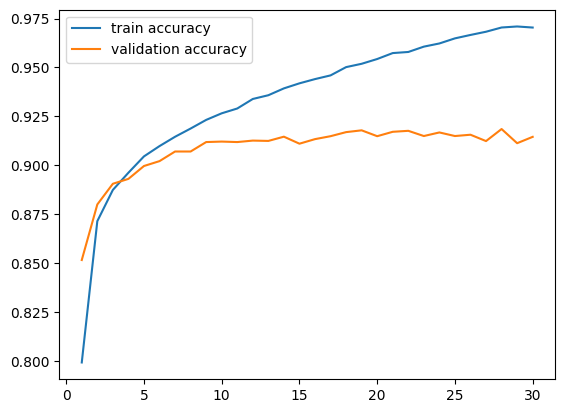

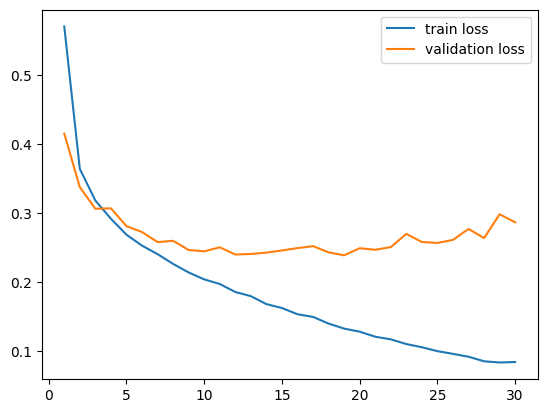

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()

plt.show()